# Neural Network basics
- A linear regression model predicts outcome by doing some of parts(inputs), and doesn't consider interactions between the parts (eg. no. of bank transactions from age, retirement status)
- A Neural Network captures interactions between the parts very well.
- Deep Learning uses specially powerful neural networks, and performs exceedingly well on prediction problems.
- Their ability to capture extremely complex interactions allows them to perform well on texts, videos, images, audios, source codes, etc.
- The intermediate nodes in hidden layers are used to calculate functions between variables (that accounts for their interactions, and use them to predict the outcome.
- Each node in hidden layer represents an aggregation of info from input, and contribute to model's ability to capture interactions.
- **!** The more nodes we have, the more interactions we capture

## Forward Propagation
- A NN uses data to make predictions through 'forward propagation'
- Each line(connection) coming out of a node has a **weight**, that indiciates how strongly that node effects the value of the hidden node at the end of it.
- These weights are the parameters we train or change when we fit our neural network to data.
- Multiply-Add process (dot product)

<img src="files/forward_prop.png">

## Activation Functions
- For NN's to achieve their max predictive power, we use activation functions in hidden layers.
- Allows model to capture non-linearities
- Just Multiply-Add process is not enough
- If the relationships in data aren't straight line relationships, we need activation functions that capture non-linearities.
- Eg. Non-linearities capture pattens like how going from 0 to 1 child may impact your banking transactions differently than going from 3 children to 4.
- Activation function is applied to a value coming into the node, to produce node output.
- Traditionally, an S-shaped function **tanh** has been a popular choice for activation function.


<img src="files/forward_activation.png">

- Today the industry standard is **ReLU (Rectified Linear Unit) function.**
- It has 2 linear units, but is surprisingly powerful when composed together over successful hidden layers.
- It returns 0 for negative inputs, and same as input otherwise.


## Deeper Networks
- Till few years ago, 15 hidden layers were state of the art, today they can be scaled up to 1000s of layers.
- The same forward propation process is iterated over subsequent layers.


<img src="files/deeper_network.png" >

- These deep networks internally build **representations of patterns in the data** (that are useful for making predictions.
- As a result they find increasingly complex patterns as we go through successive hidden layers of the network.
- This way neural networks partially replace the need for feature engineering (manually creating better predictive features)
- Deep Learning is also called **representation learning** because subsequent layers build increasingly sophisticated repsresentations of raw data, until we get to a stage where we can make predictions.
- Eg. **Image Classigication**
    <img src="files/image_classifier.png">

- The earlier layers build patterns that are conceptually simple.
- A simple interaction would look at groups of nearby pixels and find diagonal, horizontal, vertical lines, blurry areas etc.
- Subsequent layers combine these informations to discoverlarger patterns like squares or other geometric shape.
- Later layers then combine these shapes to identify face/car/etc.  
  
- Modeler doesn't need to specify those interactions, i.e. we do not tell the model to look for diagonal lines, etc.
- When we train the model, the neural network gets weights  that find the relevant patterns to make better predictions.
- This idea of finding increasingly complex/ abstract patterns is a recurring theme across domains/applications in DL

# Optimizing a Neural Network with Backward Propagation

## Need for Optimization
- Merely having the structure of a neural network does not guarantee good predictive results.
- We need to have a good choice of weights. If we change the weights, the output changes.
- The error between predicted output and actual output is the loss.
- For a single input, we may easily tweak the weights to get improved output.
- But making accurate predictions gets **harder with multiple input points**.
- For a given set of weights, there are many values of error - corresponding to many data point we make predictions on.

## Loss Function
- A loss function is used to find a single value to evaluate model performance.
- It aggregates all the errors in predictions from many data points into a single measure of model's predictive performance
- A common loss function for regression task: mean squared error - square the difference, and take their **average** - a single score
<img src="files/loss_function_gradient.png">
- Lower loss function value means a better model
- **Goal:** Find weights that give lowest loss function value - We do this by **Gradient Descent** algorithms.


## Gradient Descent

### Analogy:
1. Imagine you're in a pitch dark field, and want to find lowest point.
2. Feel the ground to see how it slopes.
3. Take a step downhill - an improvement, but not necessary the lowest point yet.
4. Repeat until it is uphill in all directions.  
This is roughly how gradient descent works.  


- If the slope is positive:
    * Going **opposite the slope** means going to a lower number.
    * This can be achieved by subtracting the slope from current value of weights.
    * But going too big a step may lead us astray.
    * Solution: **Learning Rate**
- **Learning Rate:**
    - Instead of directly subtracting the slope, we multiply it by a small no. called learning rate before subtracting from the weight
    - i.e Update each weight by subtracting **learning_rate * slope**
- Learning rates are typically around **0.01**
- This ensures we take smaller steps so that we can reliably move towards optimal weights.

### Calculating slope
- To calculate slope of loss for a  weight, we need to **multiply 3 things**:
    1. Slope of loss function w.r.t value of node we feed into (target node)
    2. Value of node that feeds into our weight (input node)
    3. Slope of activation function w.r.t to value we feed into
- i.e slope = 2 * error * input
- Eg.
<img src="files/weight_gradient_example.png">

1. slope of loss function i.e MSE w.r.t prediction:  
    * 2 * (Predicted value - Actual value) = 2 * Error
    * 2 * (-4) = -8
2. value of node we feed from = 3
3. We don't have an activation function here, so we omit it.

- So slop of loss = -8 * 3 = -24
- Let learning rate be 0.01
- So new weight = current_weight - 0.01(slope) = 2 - (-0.24) = **2.24**

* For multiple weights, we repeat this process separately for each weight and simultaneously update them using their respective derivates.

### Code to calculate slopes and update multiple weights
<img src="files/2_input_weight_update.png "/>

In [6]:
import numpy as np
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)

5


In [8]:
gradient = 2 * input_data * error
print(gradient)

[30 40]


In [9]:
weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)


2.5


## Multiple Updates to weights

In [13]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
def get_slope(input_data, target, weights):
    predicted = (input_data * weights).sum()
    error = (predicted - target)
    slope = 2 * error * input_data
    return slope

def get_mse(input_data, target, weights):
    predicted = (input_data * weights).sum()
    return (predicted - target)**2


In [14]:
input_data = np.array([1, 2, 3])
weights = np.array([0,2,1])
target = 0

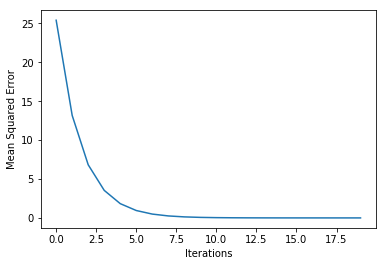

In [15]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Back Propagation
- Used to calculate slopes in complex deeper models
- It allows gradient descent to update all weights in NN ( by  getting gradients or slopes of all the weights)
- While forward propagation calculates node values and predictions using weights and inputs, backward propagation uses prediction error and calculates slopes sequentially from weights closest to output layer, through the hidden layers, back to the weights coming from inputs. 
- It comes from the chain rule of calculus.
- Don't need to memorize mathematical details, important to understand the whole process
<img src="files/backprop.png">

## Back Propagation - Big Picture
- We're trying to estimate the slope of loss function w.r.t each weight in our network (using prediction errors)
- Do forward propagation first to calcuate predictions and error, and then use them to back propagate.
- Go Back one layer at a time.
- Gradients for weights is product of:
    1. Node value feeding into that weight (input layer or hidden layers calculated during forward prop)
    2. Slope of loss function w.r.t node  it feeds into (calculated in previous step of backprop)
    3. Slope of activation function at weight's output node (For ReLU 0 or 1)
- Need to keep track of slopes of loss function w.r.t node values - to calculate slopes of weights.
- Slopes of node values are sum of the slopes of all weights coming out of them.